In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns ; sns.set()
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics


In [2]:
df = pd.read_csv("housing_price_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [4]:
df.count()

SquareFeet      50000
Bedrooms        50000
Bathrooms       50000
Neighborhood    50000
YearBuilt       50000
Price           50000
dtype: int64

In [6]:
 print(df.isnull().sum())

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64


In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(50000, 6)

In [9]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [29]:
df['Neighborhood'].replace('Rural', 0, inplace = True)
df['Neighborhood'].replace('Suburb', 1, inplace = True)
df['Neighborhood'].replace('Urban', 2, inplace = True)

In [30]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,0.998540,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,0.815838,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,0.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,0.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2.000000,2021.000000,492195.259972


In [32]:
list(df.columns)

['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt', 'Price']

In [33]:
df.shape

(50000, 6)

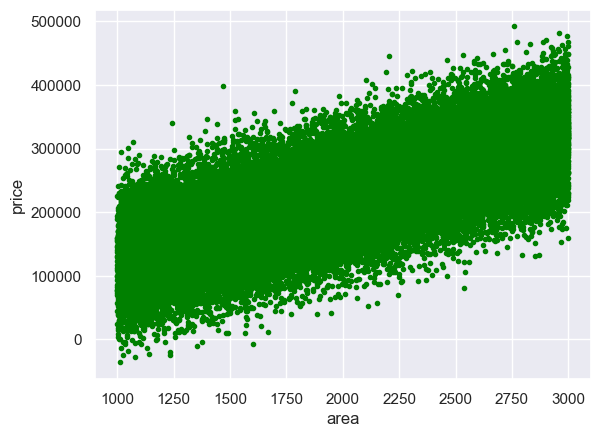

In [34]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.SquareFeet,df.Price,color='green',marker='.')

In [35]:
# Split the dataset into X and y columns
X = df.iloc[:, :-1].values            # Independent variables
y = df.iloc[:, 5].values              # Dependent variable

In [36]:
print(X)

[[2126    4    1    0 1969]
 [2459    3    2    0 1980]
 [1860    2    1    1 1970]
 ...
 [2979    5    3    1 1962]
 [2596    5    2    0 1984]
 [1572    5    3    0 2011]]


In [37]:
print(y)

[215355.2836182  195014.22162585 306891.01207633 ... 384110.55559035
 380512.68595684 221618.58321807]


In [ ]:
X.shape, y.shape

In [38]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 5), (50000,), (40000, 5), (10000, 5), (40000,), (10000,))

In [42]:
# Train the model
lr = LinearRegression().fit(X_train, y_train)

# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean:  0.5696697097025505
STD:  0.009493833049193642




In [43]:
# Calculate the intercept and coefficient
print(lr.intercept_)
print(lr.coef_)

14130.262740142673
[  99.12096851 5020.65698191 3127.67398128  753.20166965   -6.37560626]


In [44]:
# Calculate the predicted values
y_pred = lr.predict(X_test)
print(y_pred)

[271901.52577568 127793.24126561 280661.68822645 ... 123361.14213069
 286207.8834086  183873.27363194]


ValueError: x and y must be the same size

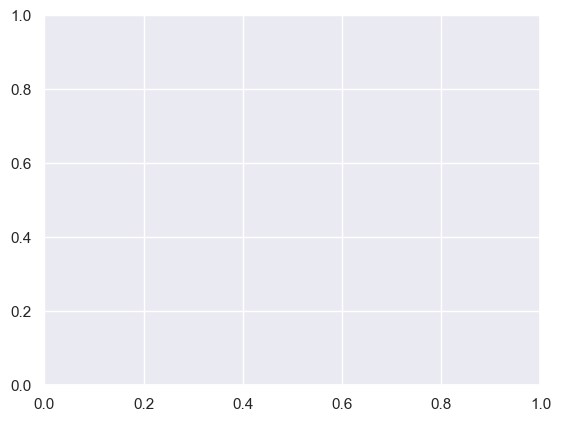

In [45]:
# Show the plotted values
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color='red')
plt.show()

In [ ]:
sns.boxplot(x="Neighborhood",y = 'Price', data= df)

In [ ]:
sns.histplot(df.Price,kde =False)

In [ ]:
X = df.drop(["Bedrooms","Bathrooms","Neighborhood","Price"] , axis="columns")
Y = df.Price

In [ ]:
# Store first two columns (Sepal length and Sepal width) in an array X 
X = df.iloc[:,:2]

# Store the target variable as lable into an array y
y = df.iloc[:,4]

# Display number of rows and columns
X.shape, y.shape

In [ ]:
print(X, y)

In [ ]:
numerical_df = df.drop('Neighborhood', axis=1)
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) 

# 0.2 means 20% for testing and random_state simply sets a seed to the random generator, so that your train-test splits
# are always deterministic. If we don't set a seed, it is different each time.

In [ ]:
# Print the shape of training and testing data along with its labels.

X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
# Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# Create KNN Classifier
kNN = KNeighborsClassifier(n_neighbors = 3)

# Train the model using the training sets
kNN.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = kNN.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Call a method predict by using an object classifier 'cls_svm'
y_predict = kNN.predict(X_test)

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_predict)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

In [ ]:
from sklearn.metrics import classification_report

# Display the classification report
print(classification_report(y_test, y_predict))